In [9]:
from goods_s.objects import *

In [10]:
objid = 168586
o = obj(objid)
z = o.z_a[0]
Npix = 156
print(z)
SFHs = np.load(f'bp_data/objid_{objid}_conv_pix_SFHs.npy', allow_pickle=True)
ages = np.load(f'bp_data/objid_{objid}_conv_pix_ages.npy', allow_pickle=True)
SFHs.shape, ages.shape

5.9500003


((2129, 3, 1654), (2129, 1654))

In [11]:
x_axes = sfr_x_axis(ages, z)
x_axes.shape

(2129, 1654)

(0.0, 1.6141273003471506)

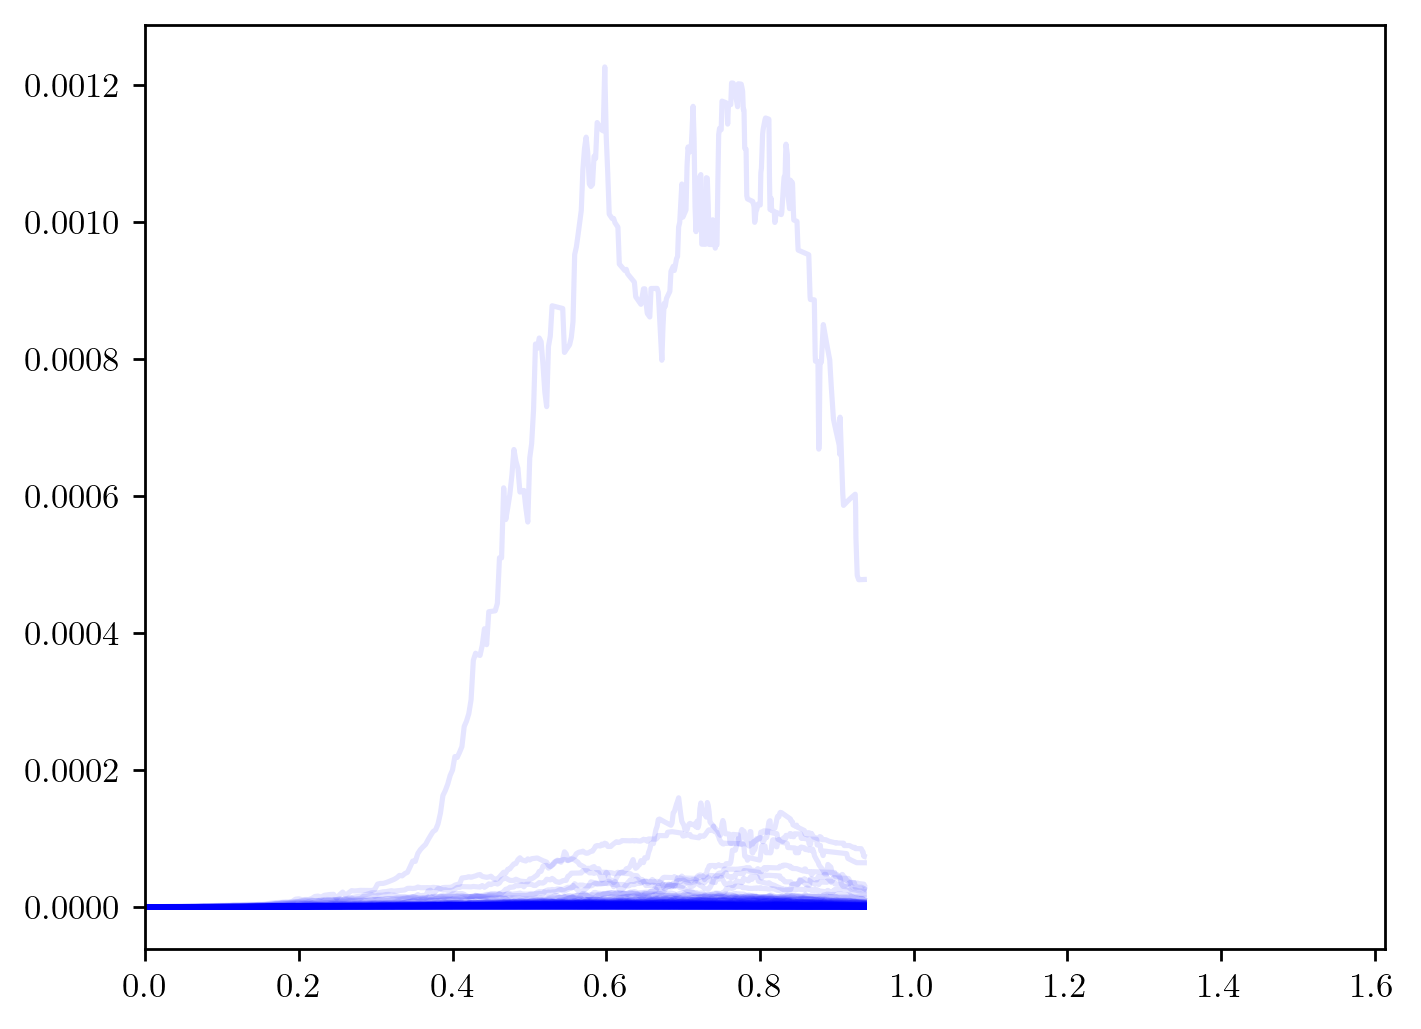

In [ ]:
# Overplot (median) SFHs for every pixel
latex()

for i in range(Npix):
    plt.plot(x_axes[i, :], SFHs[i, 1, :], color='b', alpha=0.1)
plt.xlim(0)
plt.yscale('log')

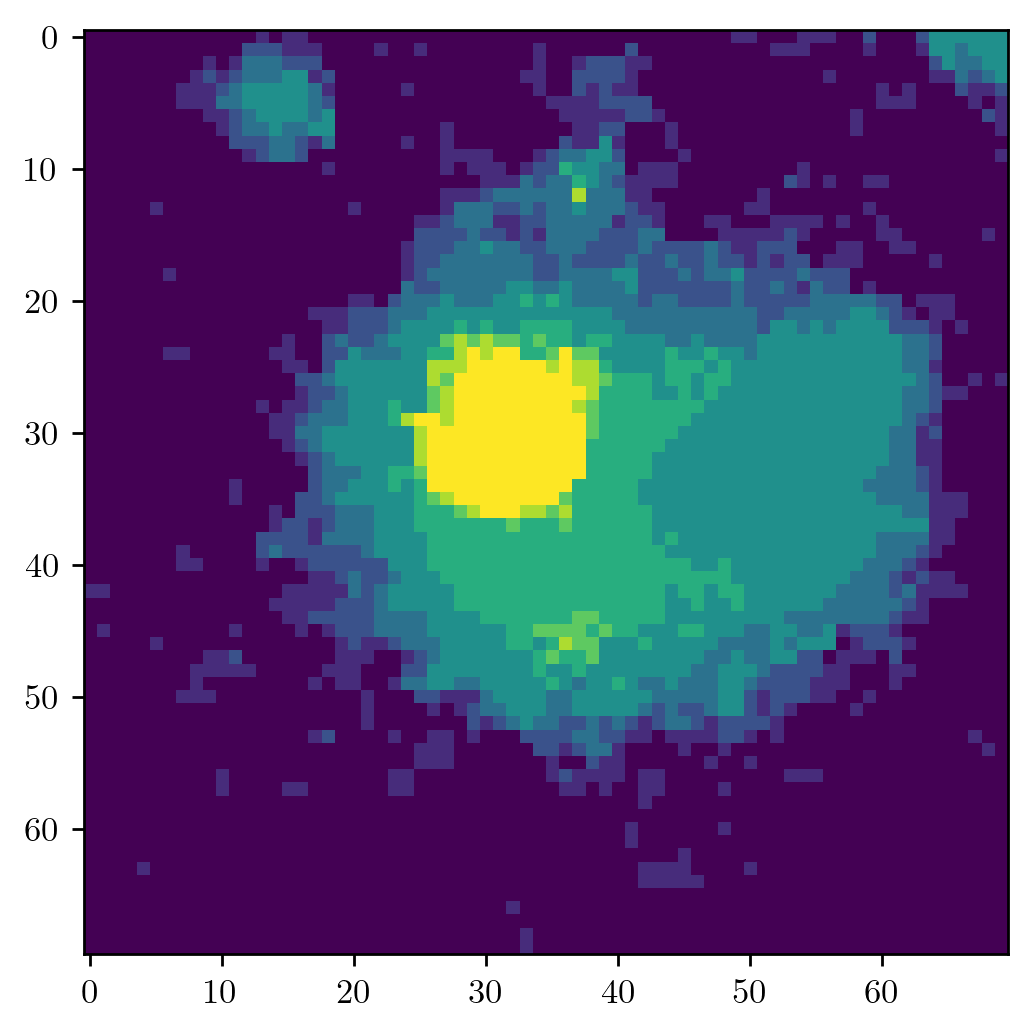

In [13]:
# Mask object data (developed and taken from bp_pix_test.ipynb)
n = 70 # pixels
filters = MOSAIC_NAMES
data = np.zeros((len(filters), n, n))
sigma = np.zeros((len(filters), n, n))
bkg = np.zeros(len(filters))
sr_pix = np.zeros(len(filters))

for i, filt in enumerate(filters):
    data[i, :, :], sigma[i, :, :], bkg[i], sr_pix[i] = o.get_mosaic_cut(filt, n=n)

snr = data / sigma
mask = np.zeros((n, n))
for i in range(len(filters)):
    segmap, cent, __ = make_segmap(data[i, :, :], sigma[i, :, :], 1.5, 25, o.a)
    mask += (np.isin(segmap, cent) & (snr[i, :, :] > 3))
plt.imshow(mask)

In [14]:
pix_mask = (mask > 0)
masked_data = data[:, pix_mask]
masked_data.shape

(8, 2129)

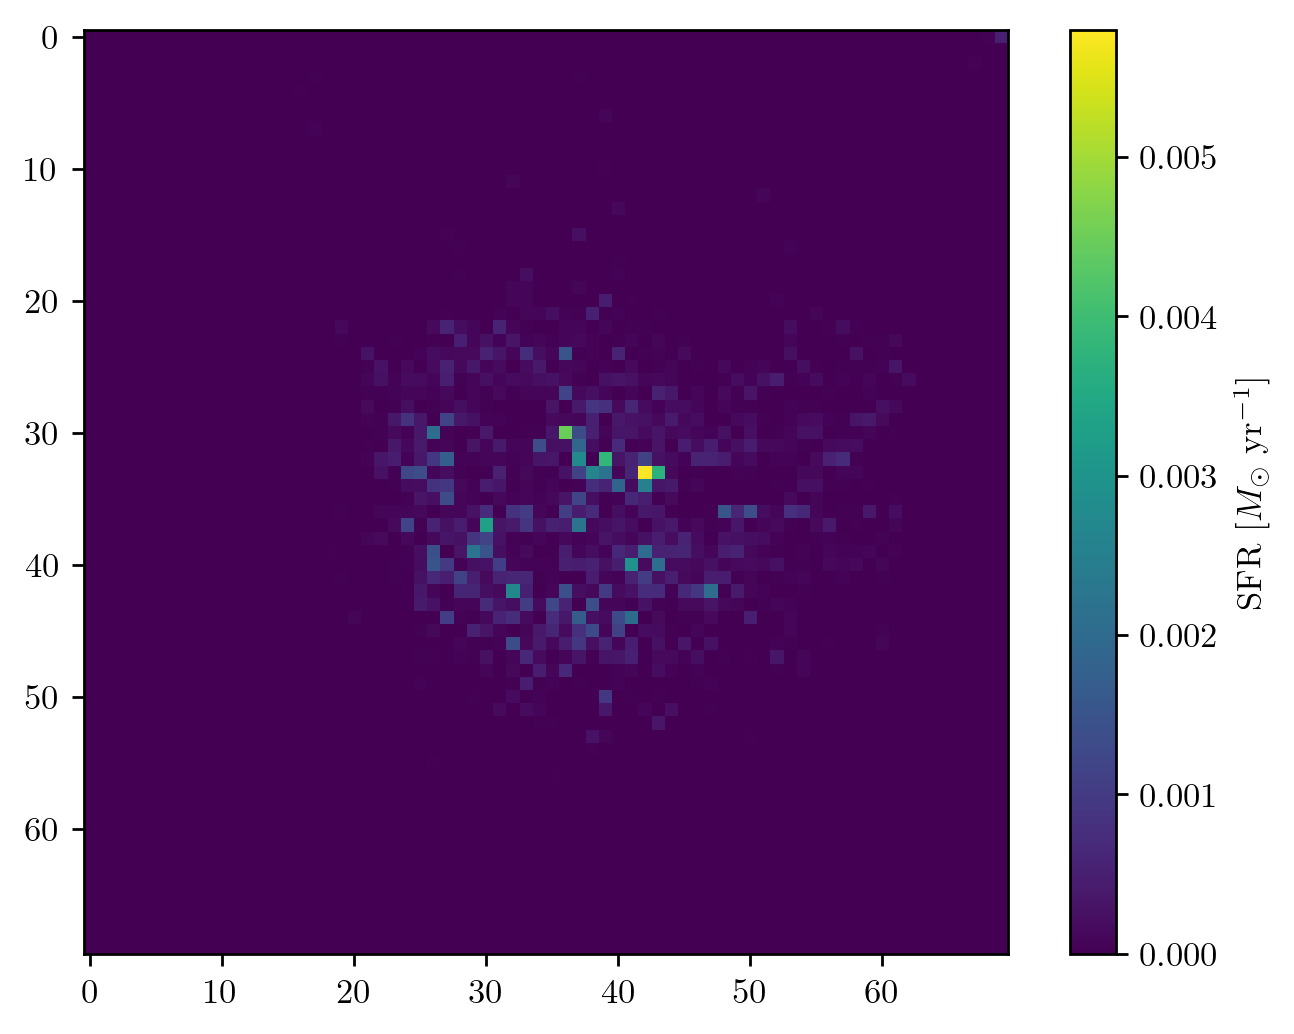

In [33]:
# Plot most recent SFH timestep as mosaic
fig, ax = plt.subplots()
sfh_mosaic = np.zeros((n, n))
SFHs[np.isnan(SFHs)] = 0
sfh_mosaic[pix_mask] = SFHs[:, 1, 0]
im = ax.imshow(sfh_mosaic)
plt.colorbar(im, ax=ax, label='SFR [$M_{\\odot}$ yr$^{-1}$]')

In [30]:
np.max(SFHs[:, 1, 0])

0.005793948285821754

In [38]:
log_sfh = np.log10(SFHs)
log_sfh[SFHs == 0] = -315
min_SFH = np.min(log_sfh)
max_SFH = np.max(log_sfh)
np.max(log_sfh), np.min(log_sfh)

/tmp/ipykernel_610958/1450611812.py:1: RuntimeWarning: divide by zero encountered in log10
  log_sfh = np.log10(SFHs)


(-0.525266610960361, -315.0)

In [18]:
x = x_axes[0, :]
x.shape, x[x>0].shape

((1654,), (1189,))

In [27]:
1189/5

237.8

In [20]:
SFHs[:, 1, x>0].shape

(2129, 1189)

In [21]:
from scipy.optimize import brentq       # For root-finding

# Function to find redshift given age (in Gyr) 
def redshift_from_age(age_gyr):
    """
    Given an age in Gyr, return the corresponding redshift z.
    """
    # Define a function whose root corresponds to the correct redshift
    def age_difference(z):
        return cosmo.age(z).value - age_gyr  # .value gives Gyr as float

    # Use brentq root-finder: redshift must be > 0, and age(z=∞) ~ 0
    z = brentq(age_difference, 1e-8, 1000)  # Bracket redshift range
    return z

z = redshift_from_age(x[x>0][0])
z

5.95495200267107

In [22]:
x[x>0][-1]

0.0035477343982204257

frame 1/237 complete
frame 1/237 complete
frame 1/237 complete
frame 1/237 complete
frame 2/237 complete
frame 3/237 complete
frame 4/237 complete
frame 5/237 complete
frame 6/237 complete
frame 7/237 complete
frame 8/237 complete
frame 9/237 complete
frame 10/237 complete
frame 11/237 complete
frame 12/237 complete
frame 13/237 complete
frame 14/237 complete
frame 15/237 complete
frame 16/237 complete
frame 17/237 complete
frame 18/237 complete
frame 19/237 complete
frame 20/237 complete
frame 21/237 complete
frame 22/237 complete
frame 23/237 complete
frame 24/237 complete
frame 25/237 complete
frame 26/237 complete
frame 27/237 complete
frame 28/237 complete
frame 29/237 complete
frame 30/237 complete
frame 31/237 complete
frame 32/237 complete
frame 33/237 complete
frame 34/237 complete
frame 35/237 complete
frame 36/237 complete
frame 37/237 complete
frame 38/237 complete
frame 39/237 complete
frame 40/237 complete
frame 41/237 complete
frame 42/237 complete
frame 43/237 complete


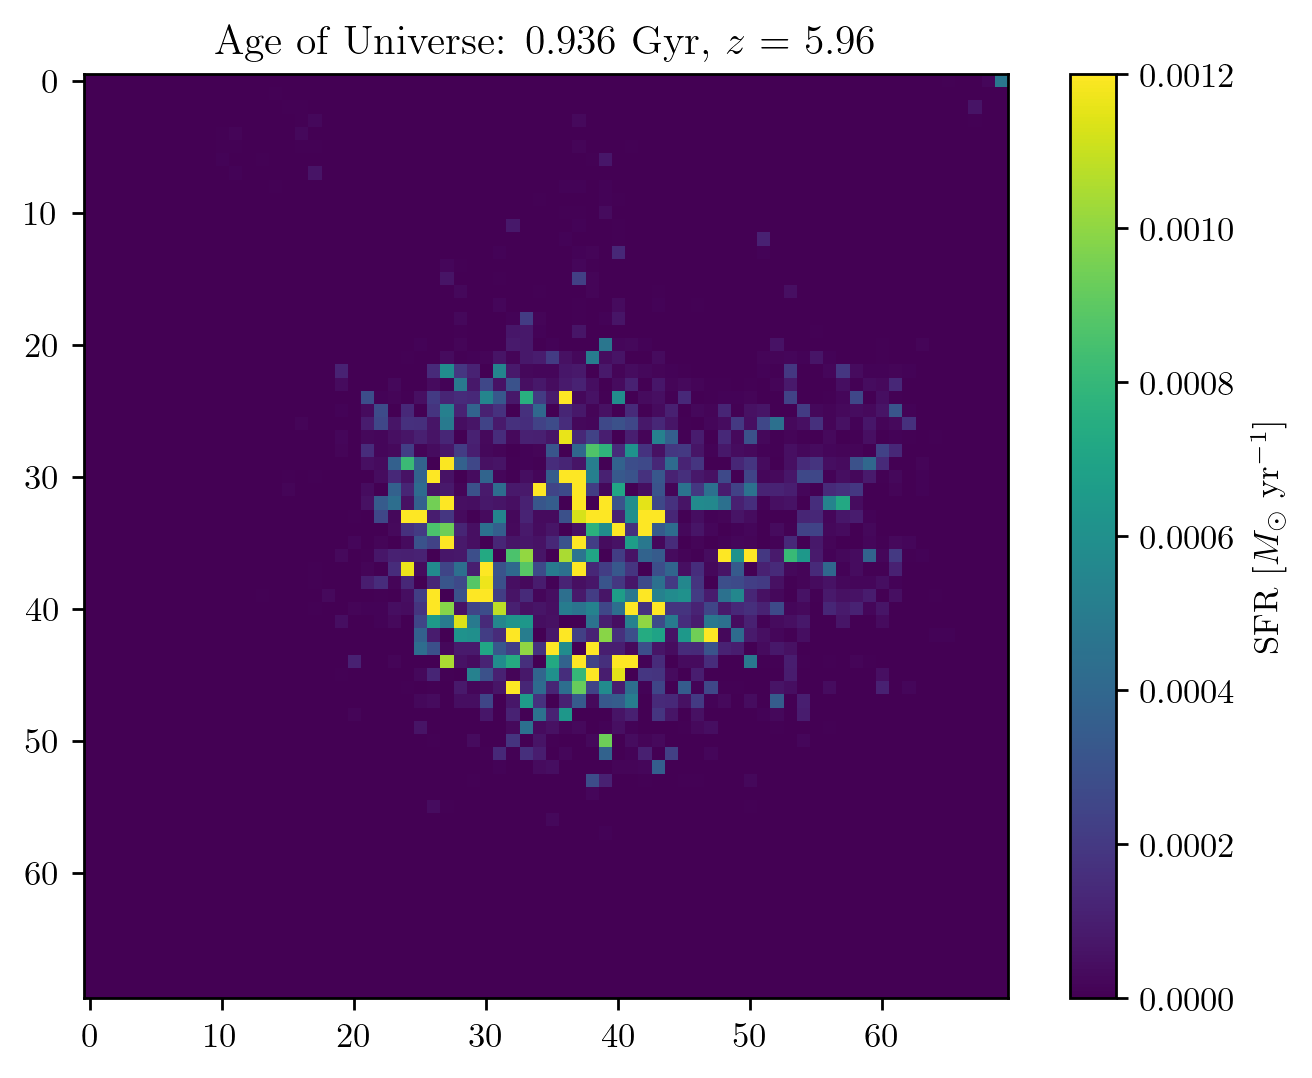

In [41]:
# MOVIE
from matplotlib.animation import FuncAnimation


# Set up the figure and image
timesteps = 237
fig, ax = plt.subplots()
data = np.zeros((n, n))
data[pix_mask] = SFHs[:, 1, -1]
im = ax.imshow(data, cmap='viridis', animated=True, vmin=0, vmax=0.0012)
plt.colorbar(im, ax=ax, label='SFR [$M_{\\odot}$ yr$^{-1}$]')

# Update function for animation
def update(frame):
    data = np.zeros((n, n))
    data[pix_mask] = SFHs[:, 1, x>0][:, -(5*frame)]
    im.set_array(data)
    xi = x[x>0][-(5*frame)]
    ax.set_title(f'Age of Universe: {xi:.3f} Gyr, $z$ = {redshift_from_age(xi):.2f}')
    print(f'frame {frame+1}/{timesteps} complete')
    return [im]

# Create animation
ani = FuncAnimation(fig, update, frames=timesteps, interval=100, blit=True)

# Save animation
ani.save(f'objid_{objid}_conv_pixSFH_5step.mp4', writer='ffmpeg', dpi=80)

frame 1/237 complete
frame 1/237 complete
frame 1/237 complete
frame 1/237 complete
frame 2/237 complete
frame 3/237 complete
frame 4/237 complete
frame 5/237 complete
frame 6/237 complete
frame 7/237 complete
frame 8/237 complete
frame 9/237 complete
frame 10/237 complete
frame 11/237 complete
frame 12/237 complete
frame 13/237 complete
frame 14/237 complete
frame 15/237 complete
frame 16/237 complete
frame 17/237 complete
frame 18/237 complete
frame 19/237 complete
frame 20/237 complete
frame 21/237 complete
frame 22/237 complete
frame 23/237 complete
frame 24/237 complete
frame 25/237 complete
frame 26/237 complete
frame 27/237 complete
frame 28/237 complete
frame 29/237 complete
frame 30/237 complete
frame 31/237 complete
frame 32/237 complete
frame 33/237 complete
frame 34/237 complete
frame 35/237 complete
frame 36/237 complete
frame 37/237 complete
frame 38/237 complete
frame 39/237 complete
frame 40/237 complete
frame 41/237 complete
frame 42/237 complete
frame 43/237 complete


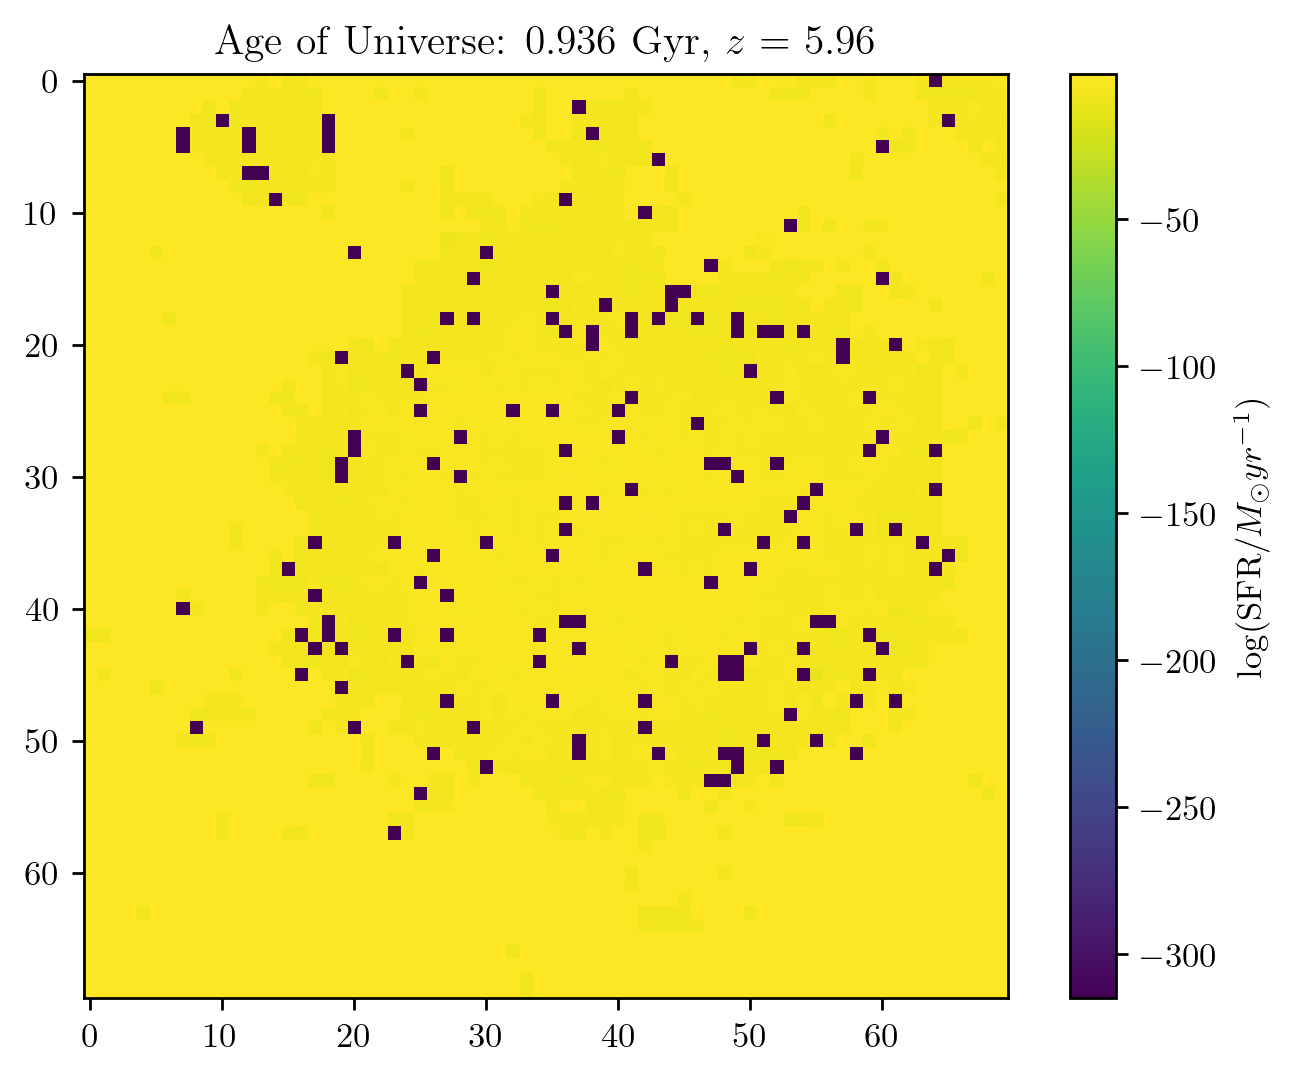

In [40]:
# MOVIE
from matplotlib.animation import FuncAnimation


# Set up the figure and image
timesteps = 237
fig, ax = plt.subplots()
data = np.zeros((n, n))
data[pix_mask] = log_sfh[:, 1, -1]
im = ax.imshow(data, cmap='viridis', animated=True, vmin=np.min(log_sfh), vmax=np.max(log_sfh))
plt.colorbar(im, ax=ax, label='$\\log(\\textup{SFR} / M_{\\odot} yr^{-1})$')

# Update function for animation
def update(frame):
    data = np.zeros((n, n))
    data[pix_mask] = log_sfh[:, 1, x>0][:, -(5*frame)]
    im.set_array(data)
    xi = x[x>0][-(5*frame)]
    ax.set_title(f'Age of Universe: {xi:.3f} Gyr, $z$ = {redshift_from_age(xi):.2f}')
    print(f'frame {frame+1}/{timesteps} complete')
    return [im]

# Create animation
ani = FuncAnimation(fig, update, frames=timesteps, interval=100, blit=True)

# Save animation
ani.save(f'objid_{objid}_conv_pixSFH_5step.mp4', writer='ffmpeg', dpi=80)

In [24]:
# sSFR
ssfr = np.load(f'bp_data/objid_{objid}_conv_pix_ssfr.npy', allow_pickle=True)
print(ssfr.shape)

data = np.zeros((n, n))
data[pix_mask] = ssfr[:, 1]
data[~pix_mask] = np.nan

# PLOT
from matplotlib.colormaps import get_cmap
cmap = get_cmap('viridis')
cmap.set_bad(color='red')
fig, ax = plt.subplots()
im = ax.imshow(data, vmin=np.min(ssfr[:, 1][~np.isnan(ssfr[:, 1])]), vmax=np.max(ssfr[:, 1][~np.isnan(ssfr[:, 1])]), cmap=cmap)
plt.colorbar(im, ax=ax, label='$\\log$(sSFR / $M_{\\odot}$ yr$^{-1}$)')


(2129, 3)


ModuleNotFoundError: No module named 'matplotlib.colormaps'

In [ ]:
np.min(ssfr[:, 1][~np.isnan(ssfr[:, 1])])

-8.199807968543666

(2069, 3)


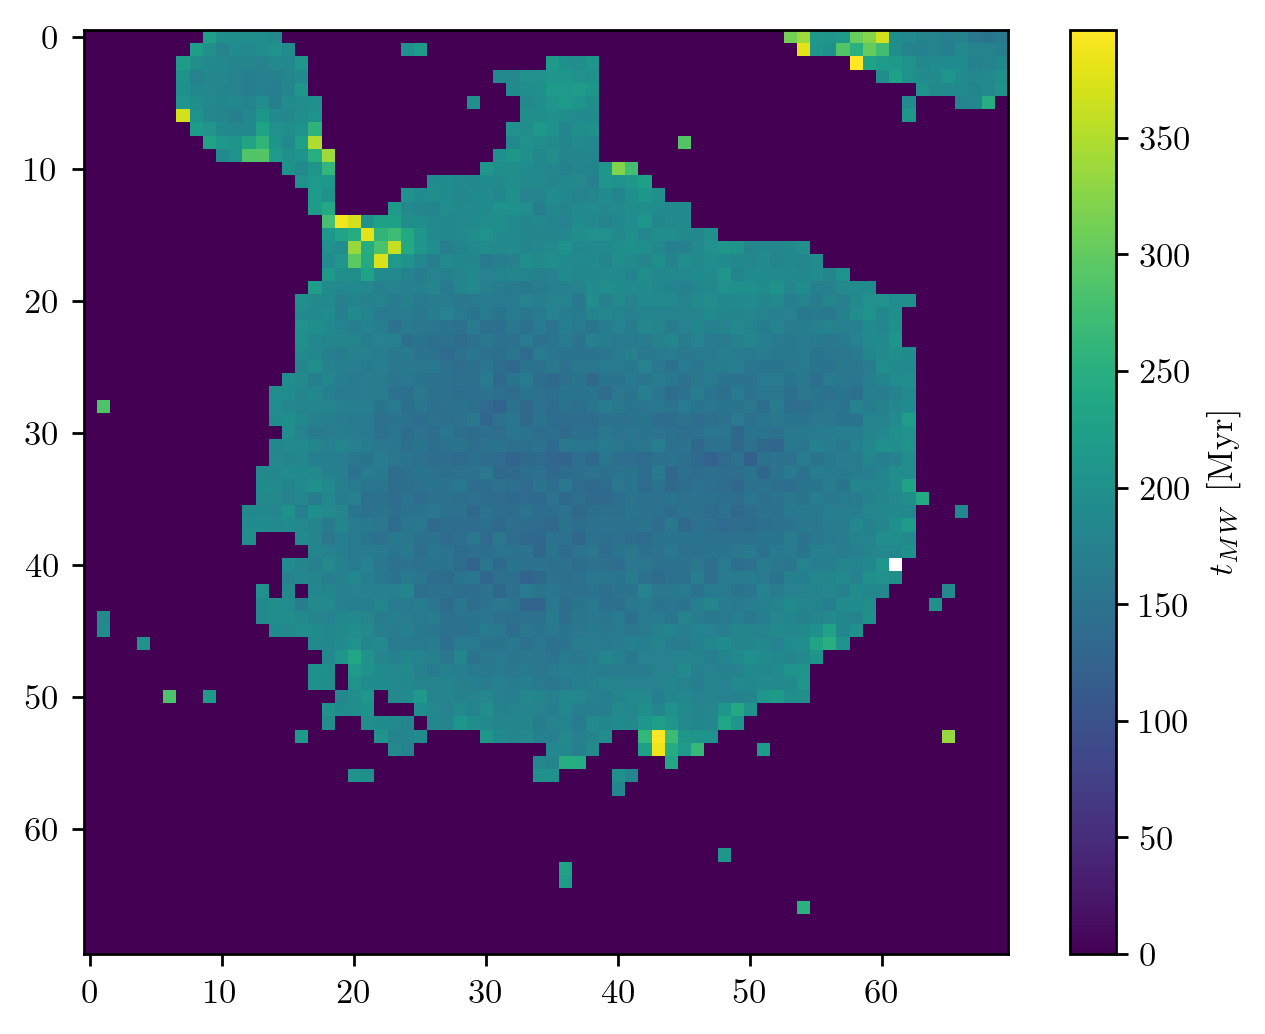

In [ ]:
# mass-weighted age
tMW = np.load(f'bp_data/objid_{objid}_conv_pix_tMW.npy', allow_pickle=True)
print(tMW.shape)

data = np.zeros((n, n))
data[pix_mask] = tMW[:, 1]*1e+3

# PLOT
fig, ax = plt.subplots()
im = ax.imshow(data)
plt.colorbar(im, ax=ax, label='$t_{MW}$ [Myr]')